In [20]:
# Name : Dimpal Lad
# CWID : 20023001
# Question No : 02

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
# Loading dataset
df = pd.read_csv('C:/Users/dimpa/OneDrive - stevens.edu/CS-513/KDD_FinalExam/KY_NJ_Zip.csv')
df.head(10)
df.dropna(inplace=True) # drops NaN values
print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists

Empty DataFrame
Columns: [STATEFIPS, STATE, zipcode, Returns_pct1, Returns_pct2, Returns_pct3, Returns_pct4, Returns_pct5, Returns_pct6, total]
Index: []


In [23]:
# Splitting the dataset
attr = df.drop(columns=['STATE', 'zipcode'])  # features
state = df['STATE']  # target variable
attr.head()

STATEFIPS  Returns_pct1  Returns_pct2  Returns_pct3  Returns_pct4  \
0         21         34.48         25.29         14.94         12.64   
1         21         36.60         26.94         14.85          9.59   
2         21         36.79         25.00         16.51         10.38   
3         21         41.67         33.33          0.00         25.00   
4         21         36.52         26.40         15.73         10.67   

   Returns_pct5  Returns_pct6  total  
0         12.64          0.00    870  
1         10.02          1.99  14070  
2         10.38          0.94   2120  
3          0.00          0.00    120  
4         10.67          0.00   1780

In [24]:
# Prepare the data for clustering
features = df[['Returns_pct1', 'Returns_pct2', 'Returns_pct3', 'Returns_pct4', 'Returns_pct5', 'Returns_pct6']]

# Normalize the data using StandardScaler (Euclidean distance)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [25]:
# Perform K-means clustering with four clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=22)
kmeans.fit(features_scaled)
labels = kmeans.labels_

C:\Users\dimpa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [26]:
# Add cluster labels to the dataframe
df['Cluster'] = labels

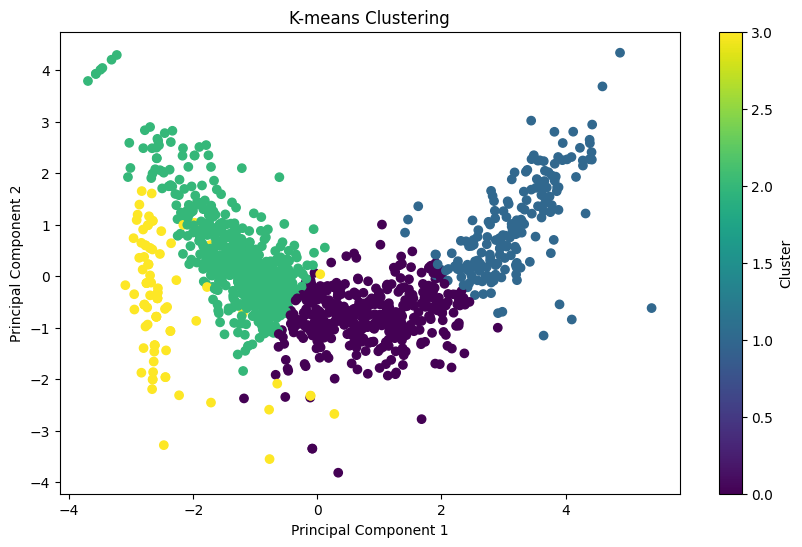

In [27]:
# Create a scatter plot
pca = PCA(n_components=2).fit(features_scaled)
pca_2d = pca.transform(features_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
# Create a cross-tabulation of the clusters versus the State
cross_tab = pd.crosstab(state, df['Cluster'])

print(cross_tab)

Cluster    0    1    2   3
STATE                     
KY       123    9  455  80
NJ       286  177  104   9
